In [1]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization

In [11]:
df = pd.read_csv("CarPrice_Assignment.csv")
df.columns
df.head()

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


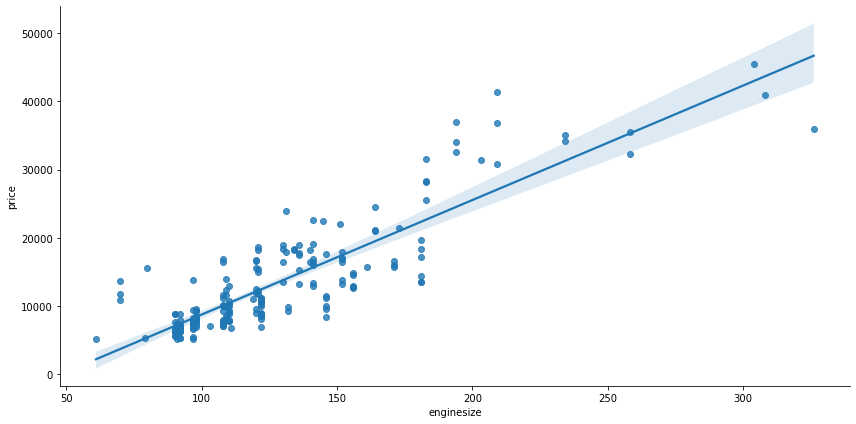

In [23]:
sns.lmplot(x='enginesize',y='price',data=df,aspect=2,height=6)

<AxesSubplot: >

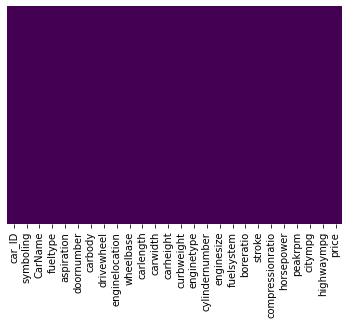

In [26]:
#no missing data
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)

/var/folders/nl/x715pbd14cjb8kswwg48b99r0000gn/T/ipykernel_58418/901178521.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


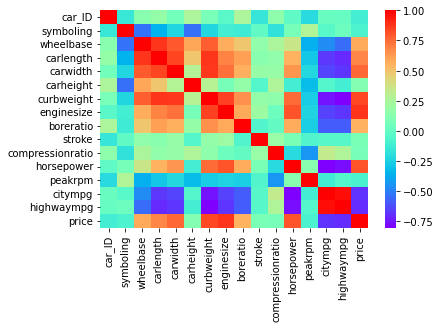

In [97]:
#clearly some correlations exist: 
#1) wheelbase,carlength,carwidth.
#2) city vs highway mpg
#also negative correlations
#1) mpg with car parameters like weight. obviously they correlate a lot
corr = df.corr()
sns.heatmap(corr, cmap = 'rainbow', annot= False); 
#wheelbase, carlength, carwidth, curb weight, engine size, bore ratio,mpg, horsepower 
# all are kinda correlated. engine size correlates best with price so let's choose that one/
# now what to keep. I think only engine size.

https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

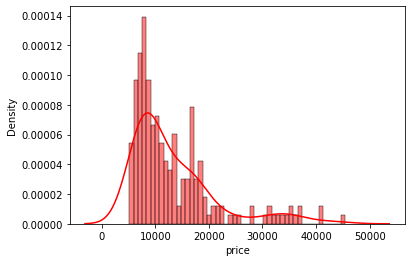

<AxesSubplot: xlabel='price', ylabel='Density'>

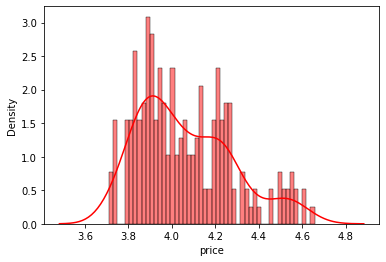

In [90]:
sns.histplot(
    df['price'],bins=50,color='r',kde=True,
    stat="density",kde_kws=dict(cut=3)
)
plt.show()
sns.histplot(
    np.log10(df['price']),bins=50,color='r',kde=True,
    stat="density",kde_kws=dict(cut=3)
)

<AxesSubplot: xlabel='cylindernumber', ylabel='price'>

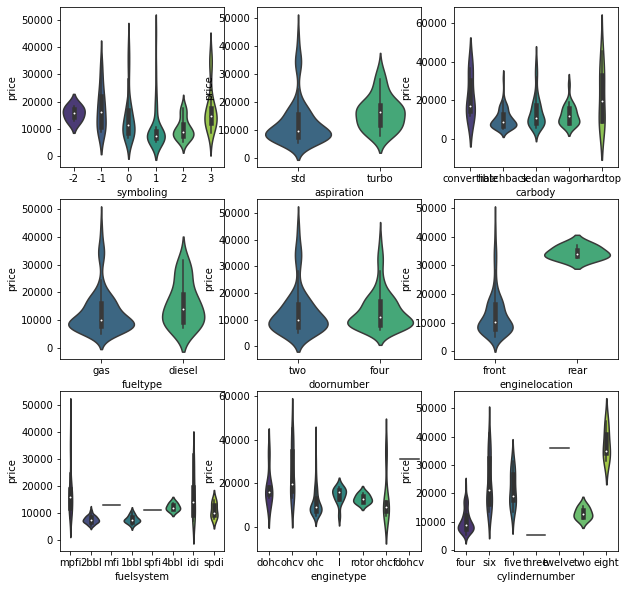

In [91]:
fig,ax = plt.subplots(3,3,figsize=(10,10))
sns.violinplot(x='symboling', y='price',data=df,palette='viridis',ax=ax[0,0])
sns.violinplot(x='aspiration', y='price',data=df,palette='viridis',ax=ax[0,1])
sns.violinplot(x='carbody', y='price',data=df,palette='viridis',ax=ax[0,2])
sns.violinplot(x='fueltype', y='price',data=df,palette='viridis',ax=ax[1,0])
sns.violinplot(x='doornumber', y='price',data=df,palette='viridis',ax=ax[1,1])
sns.violinplot(x='enginelocation', y='price',data=df,palette='viridis',ax=ax[1,2])
sns.violinplot(x='fuelsystem', y='price',data=df,palette='viridis',ax=ax[2,0])
sns.violinplot(x='enginetype', y='price',data=df,palette='viridis',ax=ax[2,1])
sns.violinplot(x='cylindernumber', y='price',data=df,palette='viridis',ax=ax[2,2])

<AxesSubplot: xlabel='drivewheel', ylabel='price'>

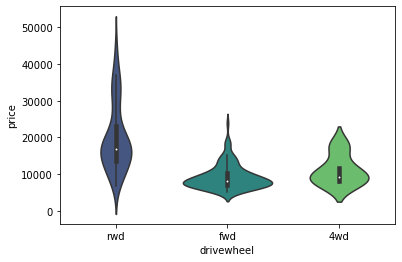

In [92]:
sns.violinplot(x='drivewheel', y='price',data=df,palette='viridis')

The best categorical, independent variables to discriminate car prices are: engine location and maybe aspiration.

<AxesSubplot: xlabel='enginelocation', ylabel='price'>

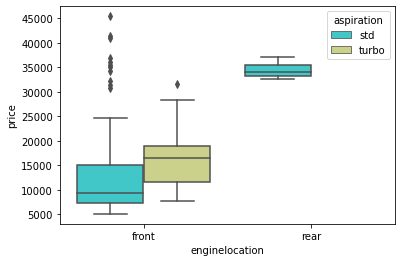

In [95]:
sns.boxplot(x='enginelocation', y='price',hue='aspiration',data=df,palette='rainbow')

lets clean up dataset

['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price']
       
Price is the dependent variable. Let's remove columns that are correlated. 

The best categorical feature is engine location. The best continuous feature is engine size. This seems simple and logical.

In [108]:
df_reduce = df[['enginelocation','enginesize','price']]
# df_reduce

In [113]:
# Dummy variable
categorical_columns = ['enginelocation']
df_encode = pd.get_dummies(data = df_reduce, prefix_sep='_', #OHE is one-hot encoding
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [114]:
df_encode

,enginesize,price,enginelocation_rear
0,130,13495.0,0
1,130,16500.0,0
2,152,16500.0,0
3,109,13950.0,0
4,136,17450.0,0
...,...,...,...
200,141,16845.0,0
201,141,19045.0,0
202,173,21485.0,0
203,145,22470.0,0


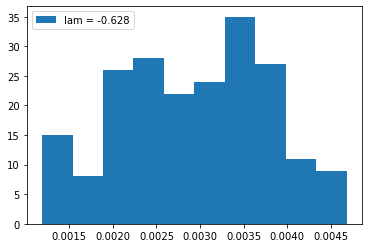

In [124]:
from scipy.stats import boxcox
y_bc,lam, ci= boxcox(df_encode['price'],alpha=0.05)

plt.hist(df_encode['price']**lam,label="lam = {:.3f}".format(lam))
plt.legend()

In [125]:
df_encode['price_boxcox'] = df_encode['price']**lam

In [127]:
from sklearn.model_selection import train_test_split
X = df_encode.drop('price',axis=1) # Independet variable
y = df_encode['price'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [131]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
# sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
# parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
# parameter_df

LinearRegression()

In [133]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  9176131.044422273
R square obtain for scikit learn library is : 0.8998107418390003


(5000.0, 50000.0)

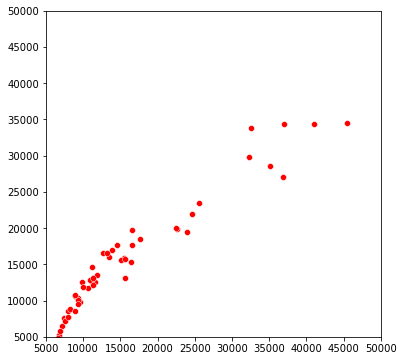

In [155]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test.values,y=y_pred_sk,color='r')
plt.xlim(5000,50000)
plt.ylim(5000,50000)

In [157]:
#it looks okay. The model consistently underestimates the price of expensive cars.

<AxesSubplot: xlabel='price', ylabel='Density'>

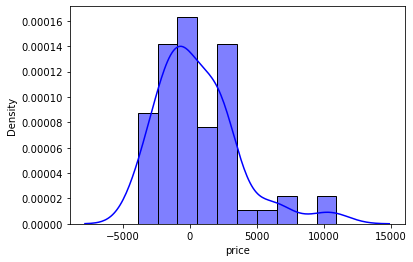

In [145]:
sns.histplot((y_test - y_pred_sk),
             bins=10,color='b',kde=True,
                stat="density",kde_kws=dict(cut=3)
)

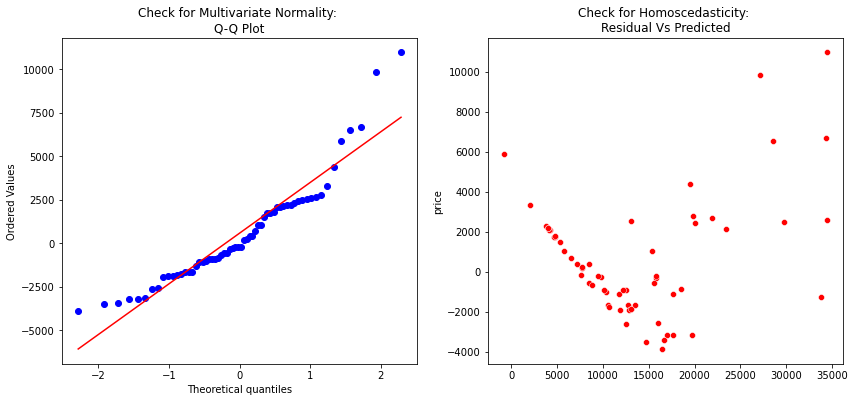

In [152]:
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');